In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 
#In particular, the Cleveland database is the only one that has been used by ML researchers to
#this date. The "goal" field refers to the presence of heart disease in the patient.
#It is integer valued from 0 (no presence) to 4.

#path to heart disease data
path=r'C:\Users\sweta\Downloads\heart.csv'
data=pd.read_csv(path)

#see what the data looks like
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
# Basic statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
#Check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='chol'>

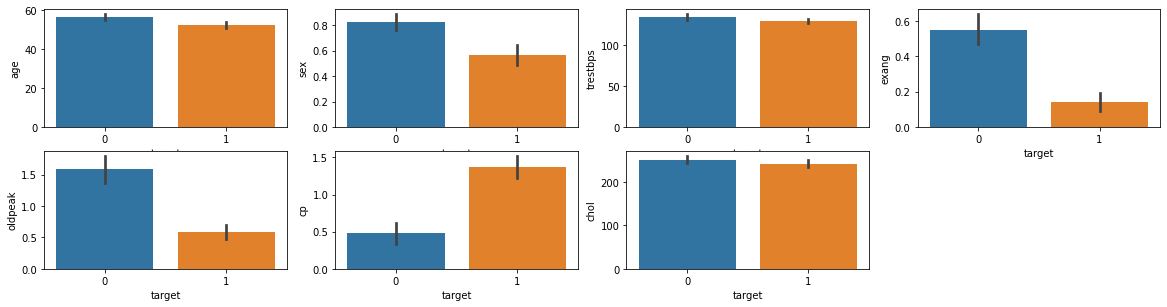

In [45]:
#EDA on dataset
plt.figure(figsize=(20,10))

plt.subplot(4,4,1)
sns.barplot(x='target', y='age', data=data)

plt.subplot(4,4,2)
sns.barplot(x='target', y='sex', data=data)

plt.subplot(4,4,3)
sns.barplot(x='target', y='trestbps', data=data)

plt.subplot(4,4,4)
sns.barplot(x='target', y='exang', data=data)

plt.subplot(4,4,5)
sns.barplot(x='target', y='oldpeak', data=data)

plt.subplot(4,4,6)
sns.barplot(x='target', y='cp', data=data)

plt.subplot(4,4,7)
sns.barplot(x='target', y='chol', data=data)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'restecg')

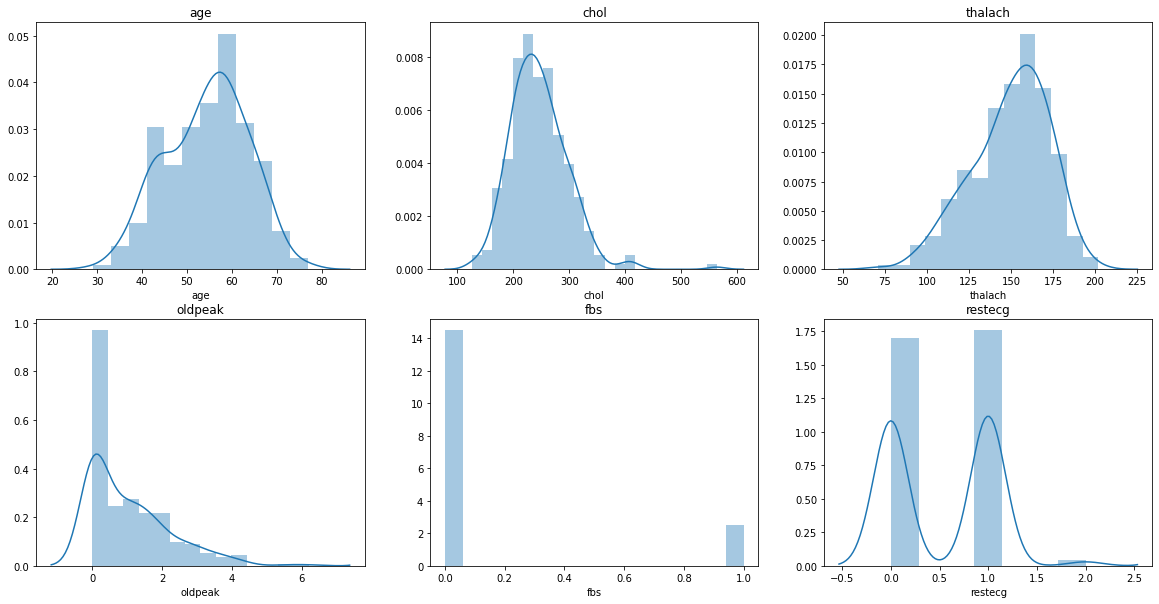

In [46]:
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.distplot(data['age']).set_title('age')

plt.subplot(2,3,2)
sns.distplot(data['chol']).set_title('chol')

plt.subplot(2,3,3)
sns.distplot(data['thalach']).set_title('thalach')

plt.subplot(2,3,4)
sns.distplot(data['oldpeak']).set_title('oldpeak')

plt.subplot(2,3,5)
sns.distplot(data['fbs']).set_title('fbs')

plt.subplot(2,3,6)
sns.distplot(data['restecg']).set_title('restecg')

In [56]:
#Preprocess the data
values=['age', 'sex','cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak','slope', 'ca', 'thal']
label=['target']
x=data[values]
y=data[label]

#normalize x values
x=normalize(x, norm='l2')

#test train split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=40)

#split train into train and val dataset
x_val, x_test, y_val, y_test=train_test_split(x_test, y_test, test_size=0.5, random_state=42)


print('Samples in whole dataset:', len(y))
print('Samples in train dataset: ', len(y_train))
print('Samples in validation dataset: ', len(y_val))
print('Samples in test dataset: ', len(y_test))

Samples in whole dataset: 303
Samples in train dataset:  212
Samples in validation dataset:  45
Samples in test dataset:  46


Training score:  0.6226415094339622
Validation score:  0.6666666666666666
Prediction score:  0.6739130434782609


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


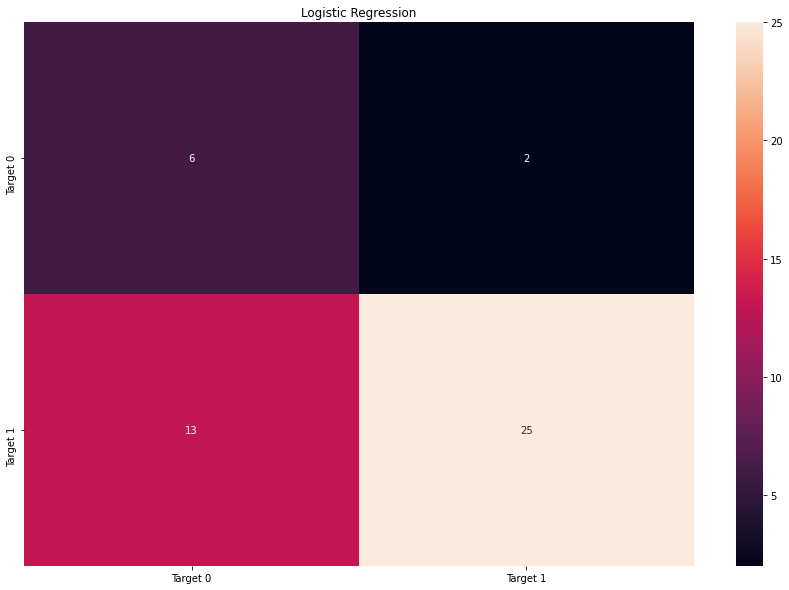

In [76]:
#Logistic regression
model=LogisticRegression()
model.fit(x_train, y_train)
training_score=model.score(x_train, y_train)
validation_score=model.score(x_val, y_val)
prediction_score=model.score(x_test, y_test)
print('Training score: ', training_score)
print('Validation score: ', validation_score)
print('Prediction score: ', prediction_score)
y_pred=model.predict(x_test)
confusion_mat= confusion_matrix(y_pred, y_test)
plt.figure(figsize = (15,10))
plt.title('Logistic Regression')
sns.heatmap(confusion_mat, annot=True,
          xticklabels = ['Target 0', 'Target 1'],
         yticklabels=['Target 0', 'Target 1']);


<ipython-input-75-bf1d13dd06f0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Training score:  1.0
Validation score:  0.8888888888888888
Prediction score:  0.8695652173913043


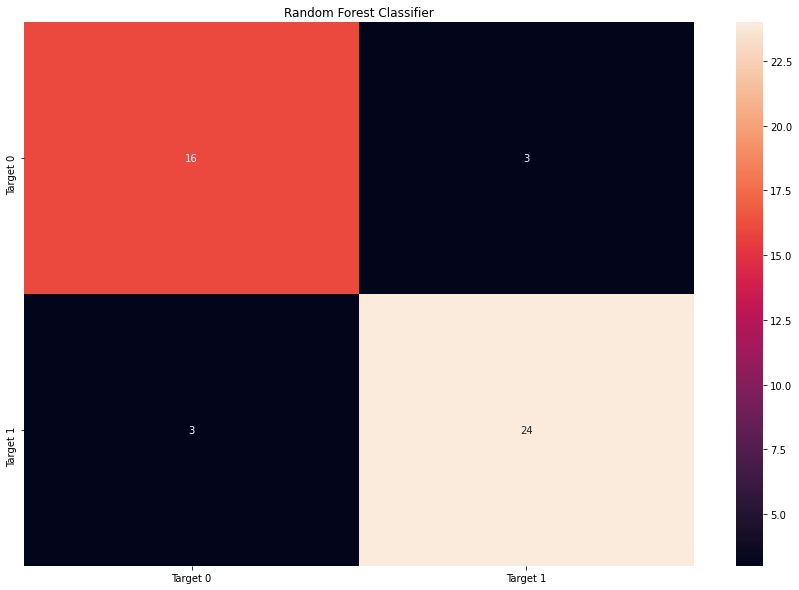

In [75]:
#Random Forest classifier
model=RandomForestClassifier()
model.fit(x_train, y_train)
training_score=model.score(x_train, y_train)
validation_score=model.score(x_val, y_val)
prediction_score=model.score(x_test, y_test)
print('Training score: ', training_score)
print('Validation score: ', validation_score)
print('Prediction score: ', prediction_score)
y_pred=model.predict(x_test)
confusion_mat= confusion_matrix(y_pred, y_test)
plt.figure(figsize = (15,10))
plt.title('Random Forest Classifier')
sns.heatmap(confusion_mat, annot=True,
          xticklabels = ['Target 0', 'Target 1'],
         yticklabels=['Target 0', 'Target 1']);

Training score:  0.6462264150943396
Validation score:  0.7111111111111111
Prediction score:  0.6956521739130435


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


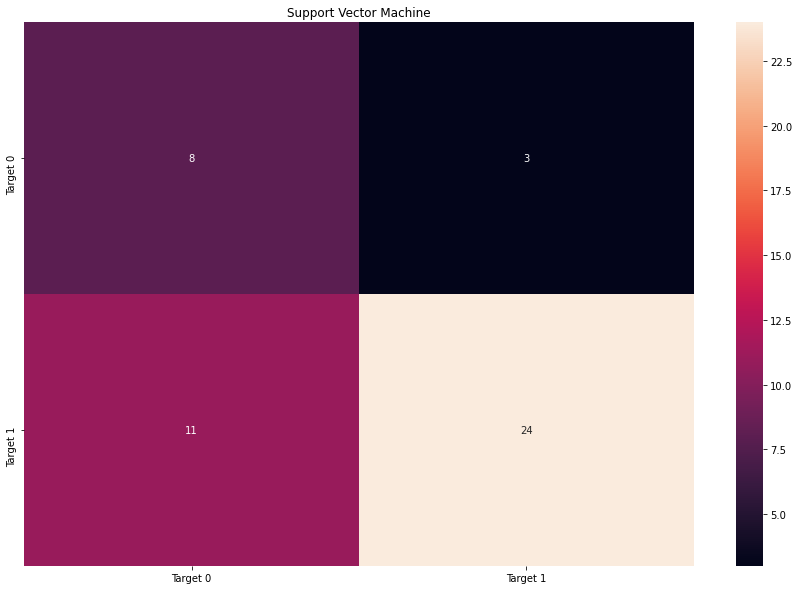

In [77]:
#SVM classifier
model=SVC()
model.fit(x_train, y_train)
training_score=model.score(x_train, y_train)
validation_score=model.score(x_val, y_val)
prediction_score=model.score(x_test, y_test)
print('Training score: ', training_score)
print('Validation score: ', validation_score)
print('Prediction score: ', prediction_score)
y_pred=model.predict(x_test)
confusion_mat= confusion_matrix(y_pred, y_test)
plt.figure(figsize = (15,10))
plt.title('Support Vector Machine')
sns.heatmap(confusion_mat, annot=True,
          xticklabels = ['Target 0', 'Target 1'],
         yticklabels=['Target 0', 'Target 1']);

Training score:  1.0
Validation score:  0.8
Prediction score:  0.7391304347826086


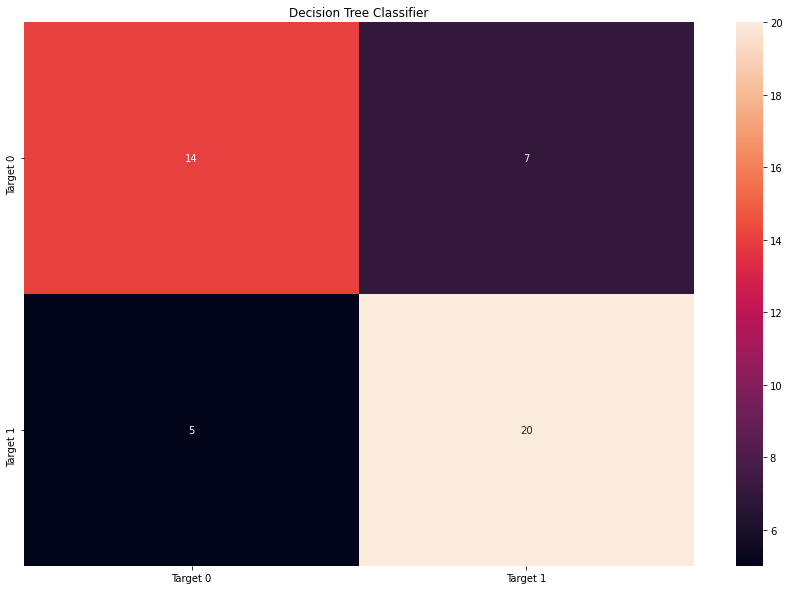

In [78]:
#Decision Tree Classifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
training_score=model.score(x_train, y_train)
validation_score=model.score(x_val, y_val)
prediction_score=model.score(x_test, y_test)
print('Training score: ', training_score)
print('Validation score: ', validation_score)
print('Prediction score: ', prediction_score)
y_pred=model.predict(x_test)
confusion_mat= confusion_matrix(y_pred, y_test)
plt.figure(figsize = (15,10))
plt.title('Decision Tree Classifier')
sns.heatmap(confusion_mat, annot=True,
          xticklabels = ['Target 0', 'Target 1'],
         yticklabels=['Target 0', 'Target 1']);

Training score:  0.7358490566037735
Validation score:  0.6444444444444445
Prediction score:  0.6739130434782609


<ipython-input-79-a7728be97577>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)


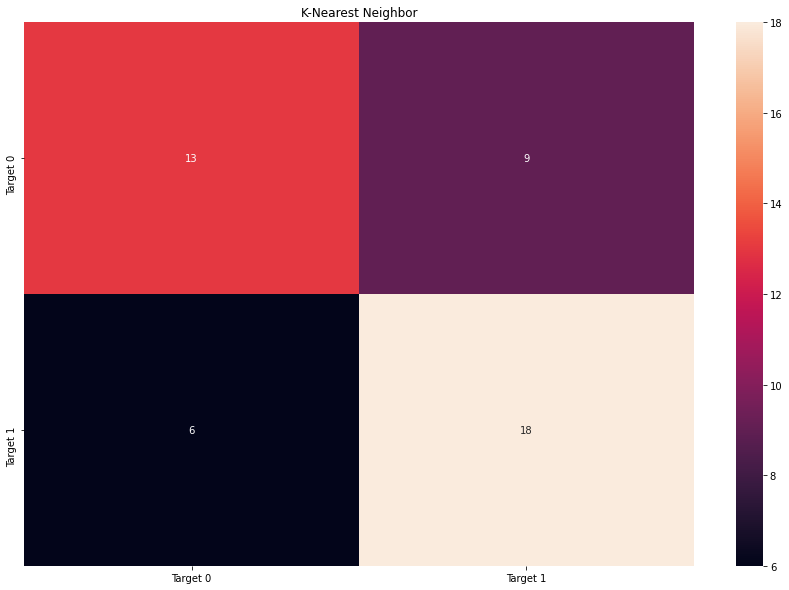

In [79]:
#K-Nearest classifier
model=KNeighborsClassifier()
model.fit(x_train, y_train)
training_score=model.score(x_train, y_train)
validation_score=model.score(x_val, y_val)
prediction_score=model.score(x_test, y_test)
print('Training score: ', training_score)
print('Validation score: ', validation_score)
print('Prediction score: ', prediction_score)
y_pred=model.predict(x_test)
confusion_mat= confusion_matrix(y_pred, y_test)
plt.figure(figsize = (15,10))
plt.title('K-Nearest Neighbor')
sns.heatmap(confusion_mat, annot=True,
          xticklabels = ['Target 0', 'Target 1'],
         yticklabels=['Target 0', 'Target 1']);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training score:  0.8066037735849056
Validation score:  0.9111111111111111
Prediction score:  0.8478260869565217


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


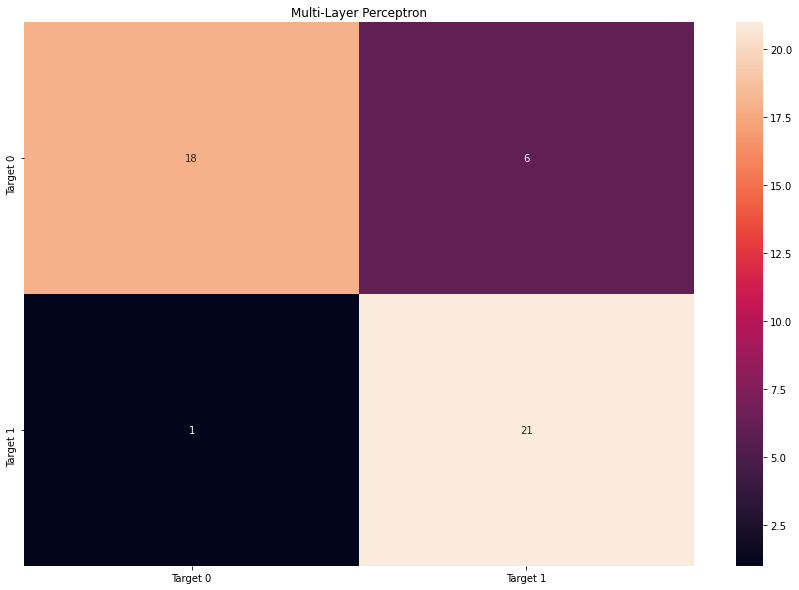

In [80]:
#MLP Classifier
model=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model.fit(x_train, y_train)
training_score=model.score(x_train, y_train)
validation_score=model.score(x_val, y_val)
prediction_score=model.score(x_test, y_test)
print('Training score: ', training_score)
print('Validation score: ', validation_score)
print('Prediction score: ', prediction_score)
y_pred=model.predict(x_test)
confusion_mat= confusion_matrix(y_pred, y_test)
plt.figure(figsize = (15,10))
plt.title('Multi-Layer Perceptron')
sns.heatmap(confusion_mat, annot=True,
          xticklabels = ['Target 0', 'Target 1'],
         yticklabels=['Target 0', 'Target 1']);